In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats, integrate
from Bio import SeqIO
from PIL import Image

In [2]:
# 设置绘图风格
sns.set_style("ticks", rc={"xtick.direction": "in", "ytick.direction": "in", "ytick.major.pad": 1})
# 处理中文乱码
plt.rcParams['font.sans-serif'] = ['Arial']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'text.usetex': False})


In [3]:
# 使用pandas读取csv文件
result_2_luc = pd.read_csv('UTR_data/Luc数据_论文.csv', encoding='GBK')
print("utr number is: ", len(result_2_luc))
result_2_luc.head()

utr number is:  24


,name,id,tag,分组,数据1,数据2,平均值,标准差,数据1相对,数据2相对,平均值相对,标准差相对
0,hHBA,mRNA_4,293T,Positive control,3445608,2825414,3135511.0,310097.0,1.000000,1.000000,1.000000,0.098898
1,UTR_16,mRNA_16,293T,In silico,6345909,6906242,6626075.5,280166.5,1.841739,2.444329,2.143034,0.301295
2,UTR_17,mRNA_17,293T,In silico,7985262,7284690,7634976.0,350286.0,2.317519,2.578273,2.447896,0.130377
3,UTR_20,mRNA_20,293T,In silico,7195219,6841660,7018439.5,176779.5,2.088229,2.421472,2.254850,0.166621
4,UTR_22,mRNA_22,293T,In silico,6695166,6363304,6529235.0,165931.0,1.943101,2.252167,2.097634,0.154533


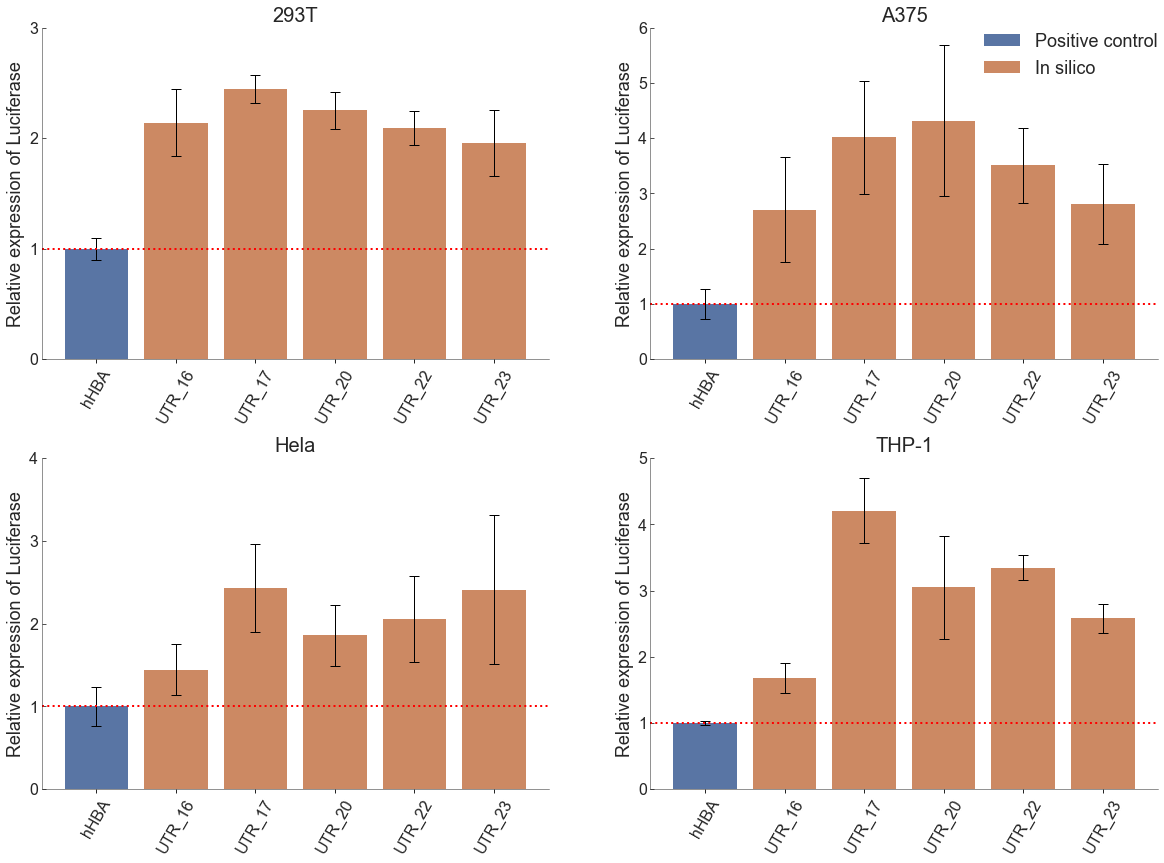

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 按 'tag' 列的不同值进行分组
tags = result_2_luc['tag'].unique()

# 创建一个 2x2 的子图布局
fig, axes = plt.subplots(2, 2, figsize=(20, 14), gridspec_kw={'hspace': 0.3})

# 迭代所有的标签，并在各自的子图上绘制图形
for i, tag in enumerate(tags):
    # 筛选当前 'tag' 的数据
    data_tag = result_2_luc[result_2_luc['tag'] == tag]
    
    # 计算当前子图位置
    ax = axes[i // 2, i % 2]
    
    # 创建带有误差棒的柱状图
    sns.barplot(ax=ax, x='name', y='平均值相对', data=data_tag, hue='分组', dodge=False, palette='deep', linewidth=0.0, order=data_tag['name'])
    
    # 添加误差棒
    ax.errorbar(x=range(len(data_tag)), y=data_tag['平均值相对'], yerr=data_tag['标准差相对'], fmt='none', c='black', capsize=5, elinewidth=1)
    
    # 设置x轴和y轴标签
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel('Relative expression of Luciferase', fontsize=18)
    
    # 设置轴的线宽
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    
    # 隐藏右边和上面的脊柱
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 设置x轴和y轴标签的字体大小
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=60, ha='center')
    
    # 设置y轴刻度间隔（动态设置）
    ax.set_yticks(range(0, int(data_tag['平均值相对'].max() + data_tag['标准差相对'].max()) + 2, 1))
    ax.tick_params(axis='y', labelsize=16)
    
    # 显示刻度线
    ax.tick_params(axis='x', direction='out', length=4, width=1, labelsize=16)
    
    # 添加水平辅助线
    hHBA_mean = data_tag[data_tag['name'] == 'hHBA']['平均值相对'].mean()
    ax.axhline(y=hHBA_mean, color='red', linestyle=':', linewidth=2)
    
    # 添加标题
    ax.set_title(f'{tag}', fontsize=20)
    
    # 移除子图的图例
    ax.get_legend().remove()

# 创建共享的图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=18, frameon=False, bbox_to_anchor=(0.815, 0.84))

# # 保存图像为高质量PDF文件
# fig.savefig('result_4/barplot_luc_combined.pdf', dpi=300, bbox_inches='tight')

# # 保存图像为高质量SVG文件
# fig.savefig('result_4/barplot_luc_combined.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_4/barplot_luc_combined.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_4/barplot_luc_combined.png')
png_image.save('result_4/barplot_luc_combined.tiff', dpi=(600, 600), compression='tiff_lzw')

# 显示图像
plt.show()


In [5]:
# 使用pandas读取csv文件
result_2_il7 = pd.read_csv('UTR_data/IL7数据_论文.csv', encoding='utf-8')
print("utr number is: ", len(result_2_il7))
result_2_il7.head()

utr number is:  24


,name,id,tag,分组,单位,稀释倍数,浓度1,浓度2,浓度3,浓度4,平均值,标准差,浓度1相对,浓度2相对,浓度3相对,浓度4相对,平均值相对,标准差相对
0,hHBA,mRNA_4,293T,Positive control,(ng/ml),1000倍,206.40,178.77,234.00,214.69,208.4650,19.854748,1.000000,1.000000,1.000000,1.000000,1.000000,0.095243
1,UTR_16,mRNA_16,293T,In silico,(ng/ml),1000倍,172.97,145.45,178.42,167.89,166.1825,12.535736,0.838033,0.813615,0.762479,0.782011,0.799035,0.028981
2,UTR_17,mRNA_17,293T,In silico,(ng/ml),1000倍,339.26,285.14,361.26,316.40,325.5150,28.195097,1.643702,1.595010,1.543846,1.473753,1.564078,0.062978
3,UTR_20,mRNA_20,293T,In silico,(ng/ml),1000倍,191.32,176.95,188.92,166.85,181.0100,9.821576,0.926938,0.989819,0.807350,0.777167,0.875319,0.086643
4,UTR_22,mRNA_22,293T,In silico,(ng/ml),1000倍,105.54,105.68,109.42,114.55,108.7975,3.667727,0.511337,0.591151,0.467607,0.533560,0.525914,0.044515


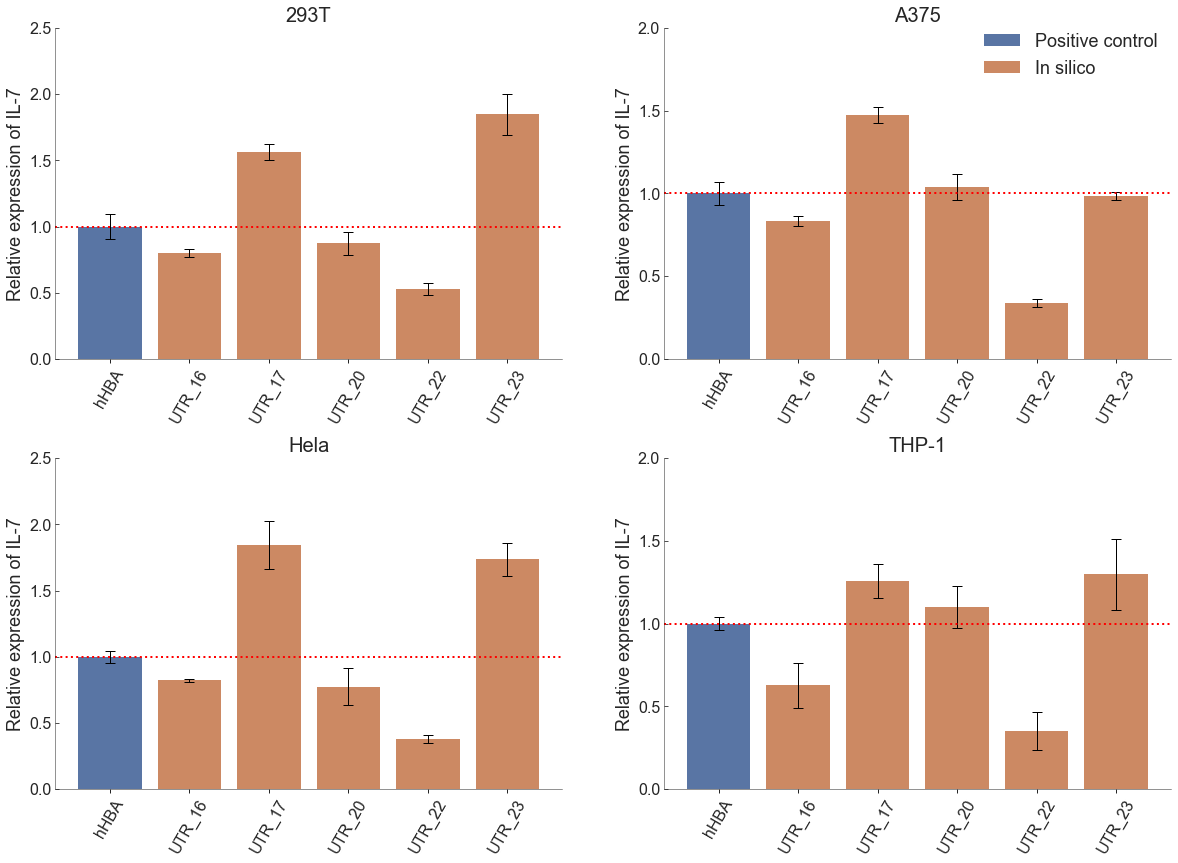

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 按 'tag' 列的不同值进行分组
tags = result_2_il7['tag'].unique()

# 创建一个 2x2 的子图布局
fig, axes = plt.subplots(2, 2, figsize=(20, 14), gridspec_kw={'hspace': 0.3})

# 迭代所有的标签，并在各自的子图上绘制图形
for i, tag in enumerate(tags):
    # 筛选当前 'tag' 的数据
    data_tag = result_2_il7[result_2_luc['tag'] == tag]
    
    # 计算当前子图位置
    ax = axes[i // 2, i % 2]
    
    # 创建带有误差棒的柱状图
    sns.barplot(ax=ax, x='name', y='平均值相对', data=data_tag, hue='分组', dodge=False, palette='deep', linewidth=0.0, order=data_tag['name'])
    
    # 添加误差棒
    ax.errorbar(x=range(len(data_tag)), y=data_tag['平均值相对'], yerr=data_tag['标准差相对'], fmt='none', c='black', capsize=5, elinewidth=1)
    
    # 设置x轴和y轴标签
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel('Relative expression of IL-7', fontsize=18)
    
    # 设置轴的线宽
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    
    # 隐藏右边和上面的脊柱
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 设置x轴和y轴标签的字体大小
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=60, ha='center')
    
    # 设置y轴刻度间隔（动态设置）
    ax.set_yticks(np.arange(0, data_tag['平均值相对'].max() + data_tag['标准差相对'].max() + 0.5, 0.5))
    ax.tick_params(axis='y', labelsize=16)
    
    # 显示刻度线
    ax.tick_params(axis='x', direction='out', length=4, width=1, labelsize=16)
    
    # 添加水平辅助线
    hHBA_mean = data_tag[data_tag['name'] == 'hHBA']['平均值相对'].mean()
    ax.axhline(y=hHBA_mean, color='red', linestyle=':', linewidth=2)
    
    # 添加标题
    ax.set_title(f'{tag}', fontsize=20)
    
    # 移除子图的图例
    ax.get_legend().remove()

# 创建共享的图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=18, frameon=False, bbox_to_anchor=(0.815, 0.84))

# # 保存图像为高质量PDF文件
# fig.savefig('result_4/barplot_il7_combined.pdf', dpi=300, bbox_inches='tight')

# # 保存图像为高质量SVG文件
# fig.savefig('result_4/barplot_il7_combined.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_4/barplot_il7_combined.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_4/barplot_il7_combined.png')
png_image.save('result_4/barplot_il7_combined.tiff', dpi=(600, 600), compression='tiff_lzw')

# 显示图像
plt.show()
